# Synthetic Data

In order to debug or evaluate an algorithm you need to work with data you not only know the “ground truth” training labels but the probability distribution. In other words, for debugging your algorithm, it is very helpful to work with “fake data”. That way, you can, for example, see how well separated the data needs to be for the ML algorithm to separate it. What will the errors look like, etc?


In [63]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
%matplotlib inline

# Generate Gausian data using Skearn.datasets.make_blobs

We will look at this problem for dimension = 2. First, we will use sklearn. Assume we have two classes A and B. 
- Data from class A is normally distributed in 2D around the mean μA = ( − 1,  − 1) with standard deviation σA = 1/8. 
- Data from class B is normally distributed in 2D around the mean μB = (1, 1) with standard deviation σB = 1/8. 

Use the sklearn function “sklearn.datasets.make_blobs” so make these blobs. In all these cases seed your random numbers.

Assume there are 250 class A points and 250 class B points. Use matplotlib to plot these points. These clusters should be very well separated and any classifier should do very well on them. Please plot the blobs with class A in blue and class B points as in red. Not that you have overplotting so you cannot see that your blobs are much denser in the middle than at the edges. Decrease the size of the dots and also use a small transparency alpha << 1 until you can clearly see dots in the core as been denser. Always beware of overplotting.

**a. std = 1/8 for both class a and class b**

In [60]:
#use make_blobs to make these blobs
#X = generated samples, y = integer labels for cluster membership of each sample

center_a = (-1,-1)
center_b = (1,1)
std= 1/8

class_a_X,class_a_y = make_blobs(n_samples = 250,n_features =1, center_box = center_a,cluster_std = std, random_state = 3)

class_b_X,class_b_y = make_blobs(n_samples = 250,n_features =1, center_box = center_b,cluster_std = std, random_state = 3)


In [41]:
#checking the shape of outputs
print(class_a_X.shape)
print(class_b_X.shape)

(250, 1)
(250, 1)


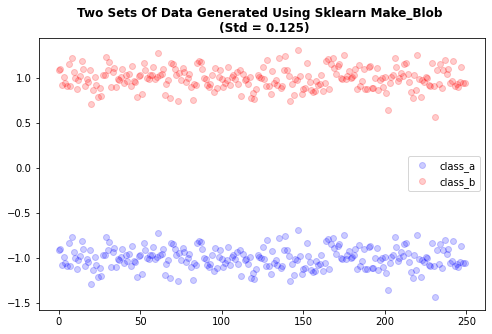

In [135]:
#use matplotlib to plot these points
plt.figure(figsize = (8,5))
plt.plot(class_a_X,"o", color="blue", alpha = 0.2, label = "class_a")
plt.plot(class_b_X,"o", color="red", alpha = 0.2, label = "class_b")
plt.legend(loc = "best")
plt.title("Two sets of data generated using sklearn make_blob \n (std = {})".format(std).title(), fontweight = 'bold')
plt.show()

The graph above is clearly linearly separable. 

**b. std = 4 for both class a and class b**


Going back to using sklearn for generating data sets we will now make the data sets less well separated. Increase the standard deviation for A and B to σA = σB = 4. Again plot the results and be careful with overplotting. It should be clear here that any classifier, no matter how clever, will get very poor performance on this data.

In [54]:
center_a_2 = (-1,-1)
center_b_2 = (1,1)
std_2 = 4
class_a_X_2,class_a_y_2 = make_blobs(n_samples = 250,n_features =1, center_box = center_a_2,cluster_std = std_2, random_state = 3)

class_b_X_2,class_b_y_2 = make_blobs(n_samples = 250,n_features =1, center_box = center_b_2,cluster_std = std_2, random_state = 3)


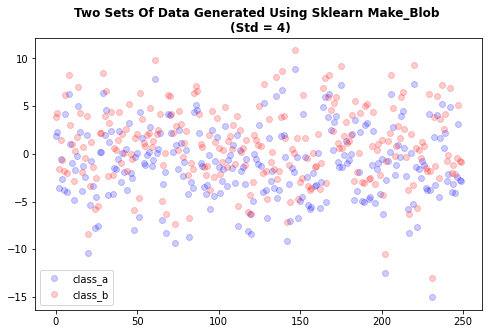

In [134]:
#use matplotlib to plot these points
plt.figure(figsize = (8,5))
plt.plot(class_a_X_2,"o", color="blue", alpha = 0.2, label = "class_a")
plt.plot(class_b_X_2,"o", color="red", alpha = 0.2, label = "class_b")
plt.legend(loc = "best")
plt.title("Two sets of data generated using sklearn make_blob \n (std = {})".format(std_2).title() , fontweight = 'bold')
plt.show()

The graph above doesn't seem to be well separated

**c. Create clearly separable data (not linearly separable) using sklearn.datasets.make_circles**

For our last example, we want to create data that is clearly separable but not linearly separable. Use sklearn.datasets.make_circles to make two circles in 2D each with 500 points. Unfortunately, we don’t want a little circle in the middle but a normally disturbed blob. Use fancy indexing to isolate data on the outer circle only (class B). Then generate a blob in the center (class A) which will have mean μA = (0, 0) and standard deviation σA = 1/8. Again show this data set in red and blue for the classes, showing that they are well separated.

(500, 2)
(500,)
[0 1]
[[-1.15896596 -0.08528243]
 [ 0.03384523  0.18330648]
 [ 0.44292776  0.86385559]
 [ 0.81511909 -0.43586184]
 [ 0.05181266 -1.00407258]]


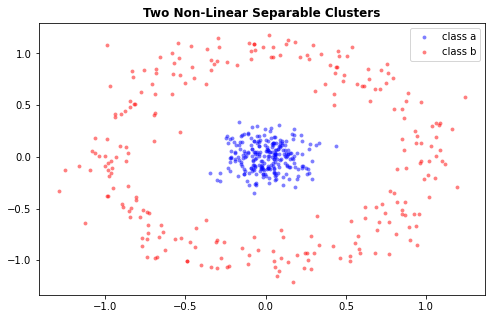

In [141]:
class_a_cir_std = 1/8
sample_size = 500

#generate two rings for class A and class B
#sklearn.datasets.make_circles - Make a large circle containing a smaller circle in 2d.

X_cir, y_cir = make_circles(n_samples= sample_size, random_state = 3, 
                            noise = class_a_cir_std, factor = 0.1)

#sanity check
print(X_cir.shape)
print(y_cir.shape)
print(np.unique(y_cir))
print(X_cir[:5,:])

plt.figure(figsize = (8,5))


#class A ring is where the label (y) = 1
plt.scatter(X_cir[y_cir ==1,0],X_cir[y_cir ==1,1], color="blue", 
            alpha = 0.5, label = "class a",s=15, lw=0
           )

#class B ring is where the label(y) = 0
plt.scatter(X_cir[y_cir ==0,0],X_cir[y_cir ==0,1], color="red",
            alpha = 0.5, label = "class b", s=15, lw=0)

plt.legend(loc = "best")
plt.title("Two Non-linear separable clusters".title(), fontweight = "bold")
plt.show()


The two clusters shown in the graph above are clearly non-linearly separable.

# Generate Gausian data using Numpy.random.randn



You may not always have access to sklearn. 
Reado your results in a. using only numpy.random.randn. Without using sklearn you should be able to achieve the same results, albeit with more lines of code.

In [44]:
# np.random.randn -- return a sample (or samples) from the “standard normal” distribution
class_a_std = 1/8
class_a_mean = -1
class_a = class_a_std * np.random.randn(250) + class_a_mean

class_b_std = 1/8
class_b_mean = 1
class_b = class_b_std * np.random.randn(250) + class_b_mean

In [46]:
print(class_a.shape)
print(class_b.shape)

(250,)
(250,)


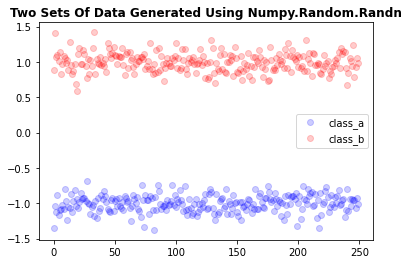

In [48]:
#use matplotlib to plot these points
plt.plot(class_a,"o", color="blue", alpha = 0.2, label = "class_a")
plt.plot(class_b,"o", color="red", alpha = 0.2, label = "class_b")
plt.legend(loc = "best")
plt.title("Two sets of data generated using Numpy.random.randn".title(), fontweight = 'bold')
plt.show()